In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
df_10 = pd.read_csv("XOR_input_10.csv")
df_01 = pd.read_csv("XOR_input_01.csv")
df_11 = pd.read_csv("XOR_input_11.csv")

length = 100
output_10 = np.array(df_10[df_10['track'] == 2]['y']) - np.mean(df_10[df_10['track'] == 2]['y'])
output_10 = output_10[:length]
output_01 = np.array(df_01[df_01['track'] == 2]['y']) - np.mean(df_01[df_01['track'] == 2]['y'])
output_01 = output_01[4:4+length]
output_11 = np.array(df_11[df_11['track'] == 1]['y']) - np.mean(df_11[df_11['track'] == 1]['y'])
output_11 = output_11[30:30+length]



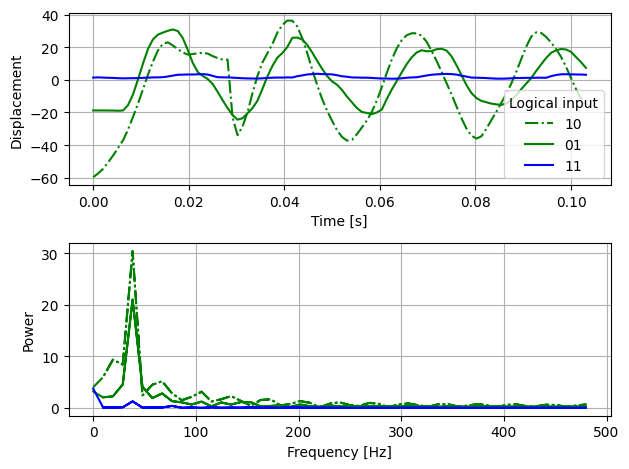

In [37]:
sampling_rate = 960
T = 1.0 / sampling_rate  
N = len(output_01)

t = np.linspace(0.0, N*T, N, endpoint=False)

fig, (ax1, ax2) = plt.subplots(2, 1)
for signal, label, color, style in [(output_10, '10', 'green', 'dashdot'), (output_01, '01', 'green', 'solid'),  (output_11, '11', 'blue', 'solid')]:
    fft_values = np.fft.fft(signal)

    # Frequency vector
    xf = np.abs(np.fft.fftfreq(N, T))
    # Plot the signal
    ax1.plot(t, signal, label=label, color=color, linestyle=style)
    # ax1.set_title('Time Domain Signal')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Displacement')

    # Plot the FFT magnitude
    # if signal == '10':
    ax2.plot(xf, 2.0/N * np.abs(fft_values), label=label, color=color, linestyle=style)
    # e
    # ax2.set_title('Frequency Domain Signal')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power')

for ax in [ax1, ax2]:
    ax.grid()
# ax.legend()

ax1.legend(title='Logical input')

plt.tight_layout()
plt.show()
